In [1]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

In [2]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                      stratify=y,
                      random_state=0)

# standardize the features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [3]:
print('X_test:', X_test[0])
print('X_test_std:', X_test_std[0])

X_test: [1.377e+01 1.900e+00 2.680e+00 1.710e+01 1.150e+02 3.000e+00 2.790e+00
 3.900e-01 1.680e+00 6.300e+00 1.130e+00 2.930e+00 1.375e+03]
X_test_std: [ 0.89443737 -0.38811788  1.10073064 -0.81201711  1.13201117  1.09807851
  0.71204102  0.18101342  0.06628046  0.51285923  0.79629785  0.44829502
  1.90593792]


In [4]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvectors [0] \n%s' % eigen_vecs[0])
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvectors [0] 
[-0.13724218  0.50303478 -0.13774873 -0.0032961  -0.29062523  0.29909685
  0.07905293 -0.36817641 -0.39837702 -0.09448698  0.37463888 -0.12783451
  0.26283426]

Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


In [5]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in
           sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

<Figure size 640x480 with 1 Axes>

In [6]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]
# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)


In [7]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [8]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [9]:
X_train_pca = X_train_std.dot(w)

In [10]:
X_train_pca

array([[ 2.38299011,  0.45458499],
       [-1.96578183,  1.65376939],
       [-2.53907598,  1.02909066],
       [-1.43010776,  0.6024011 ],
       [ 3.14147227,  0.66214979],
       [ 0.50253552, -2.08907131],
       [ 0.04867722, -2.27536044],
       [ 2.47888989, -0.08603318],
       [ 2.01900259, -1.3538719 ],
       [ 0.75156583, -2.55367947],
       [ 0.72268915, -1.18404391],
       [-3.00366211,  0.94626934],
       [ 2.57518878, -1.0697549 ],
       [ 3.73151104,  1.01968876],
       [-1.12276518,  0.13877   ],
       [ 2.85996853,  2.28819559],
       [-0.74717125, -3.21746061],
       [-1.58427878,  0.16048055],
       [ 3.38887101,  2.11550689],
       [ 3.15405473,  0.54233966],
       [-1.28036506, -1.72926871],
       [-1.71438911,  0.71745249],
       [-1.55040291, -1.7580591 ],
       [ 1.10984489, -1.20480693],
       [-0.69108418, -1.71385374],
       [-2.086036  , -1.68453671],
       [ 2.90393456,  1.95258805],
       [-2.07635784,  1.47183304],
       [-1.74756185,

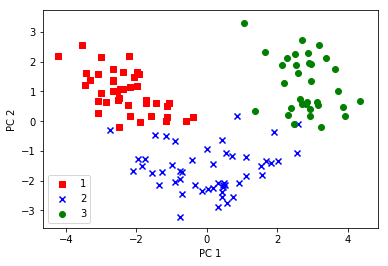

In [11]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0],
                X_train_pca[y_train == l, 1],
                c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

In [12]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)



In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
lr = LogisticRegression(solver='lbfgs', multi_class='auto')
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

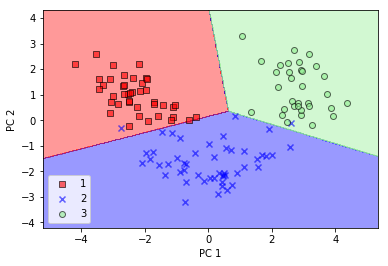

In [14]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

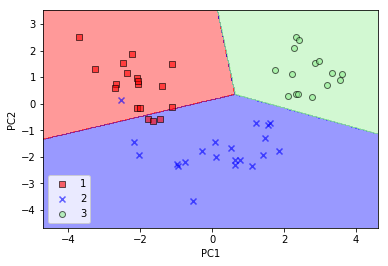

In [15]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.show()

In [16]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

In [17]:
np.unique(y)

array([1, 2, 3])

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

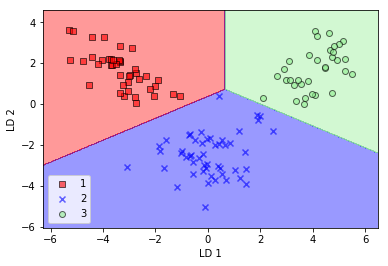

In [19]:
lr = LogisticRegression(solver='lbfgs', multi_class='auto')
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

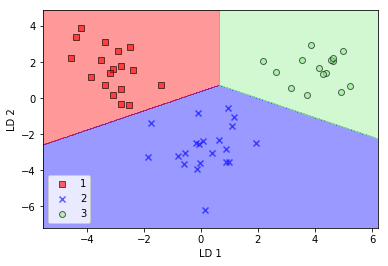

In [20]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

In [21]:
from sklearn import datasets
iris = datasets.load_iris()
X, y = iris.data[:, [2, 3]], iris.target

In [41]:
X[0:5], y[0:5]
X[0:25], y[0:25]

(array([[-0.08769568,  1.08597835],
        [-0.83755821,  0.54731034],
        [ 0.79684284,  0.41149548],
        [ 0.21215762,  0.10698486],
        [-0.0536839 ,  0.9796336 ],
        [ 0.0892458 ,  0.23355252],
        [-0.56754307, -0.80796973],
        [ 0.73499347, -0.470101  ],
        [ 0.28711857, -0.03244849],
        [ 0.86687928, -0.21027292],
        [-0.74571525,  0.71914282],
        [-0.92491365,  0.33306148],
        [-0.73712068,  0.514367  ],
        [ 0.16323661, -0.90185085],
        [-0.41222782,  0.90837718],
        [-0.37428571, -0.80438437],
        [-0.27395513, -0.14756239],
        [-0.54001075, -0.75448387],
        [-1.03407374, -0.2295831 ],
        [ 0.51959807, -1.02997092],
        [ 0.02117837, -0.8659704 ],
        [-0.56035423, -0.57408245],
        [-0.94211667,  0.42150119],
        [ 0.06904053, -0.16554214],
        [ 0.01289398,  0.04557793]]),
 array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 1, 1]))

In [23]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                      stratify=y,
                      random_state=0)

# standardize the features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [24]:
X_train_std[0:5]

array([[ 1.0808002 ,  1.70475496],
       [ 1.63709442,  1.31106155],
       [ 0.85828251,  1.44229269],
       [-1.53378264, -1.31356119],
       [-1.31126495, -1.31356119]])

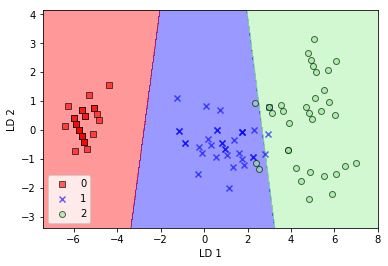

In [25]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
lr = LogisticRegression(solver='lbfgs', multi_class='auto')
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

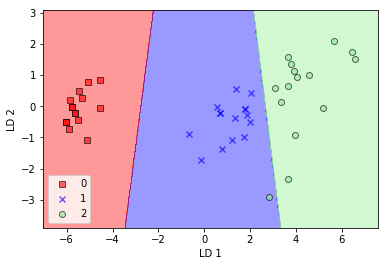

In [26]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.show()

In [27]:
pca = PCA(n_components=2)
lr = LogisticRegression(solver='lbfgs', multi_class='auto')
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

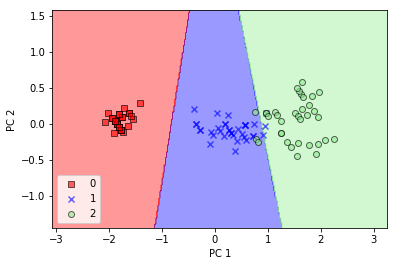

In [28]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

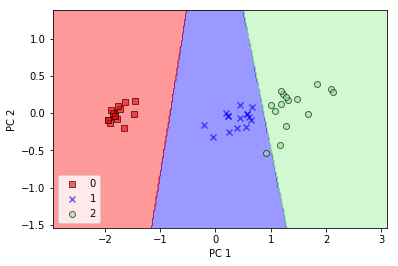

In [29]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()

In [50]:
print(lr.predict([[2, 6]]))

[1]


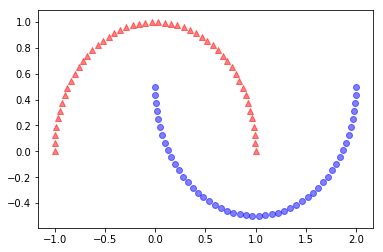

In [30]:
from sklearn.datasets import make_moons
from sklearn.decomposition import KernelPCA

X, y = make_moons(n_samples=100, random_state=123)
plt.scatter(X[y == 0, 0], X[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1],
            color='blue', marker='o', alpha=0.5)
plt.show()

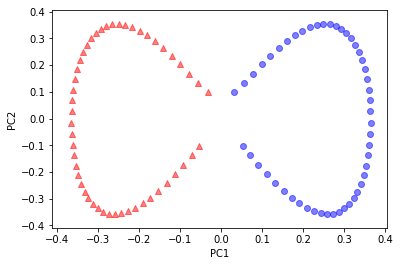

In [31]:
scikit_kpca = KernelPCA(n_components=2,
                        kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)
plt.scatter(X_skernpca[y == 0, 0], X_skernpca[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y == 1, 0], X_skernpca[y == 1, 1],
            color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

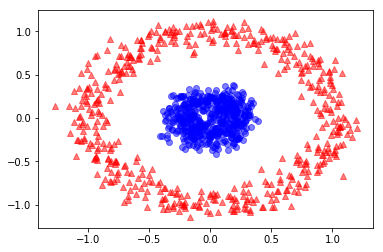

In [32]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000,
                    random_state=123, noise=0.1, factor=0.2)
plt.scatter(X[y == 0, 0], X[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1],
            color='blue', marker='o', alpha=0.5)
plt.show()

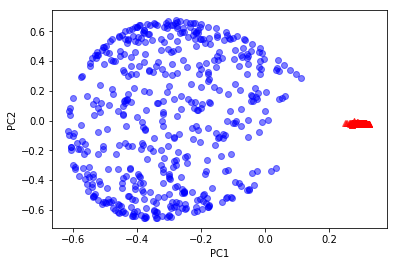

In [33]:
scikit_kpca = KernelPCA(n_components=2,
                        kernel='rbf', gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)
plt.scatter(X_skernpca[y == 0, 0], X_skernpca[y == 0, 1],
            color='red', marker='^', alpha=0.5)
plt.scatter(X_skernpca[y == 1, 0], X_skernpca[y == 1, 1],
            color='blue', marker='o', alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [34]:
X_train, X_test, y_train, y_test = \
    train_test_split(X_skernpca, y, test_size=0.3, 
                      stratify=y,
                      random_state=0)

# standardize the features
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

pca = PCA(n_components=2)
lr = LogisticRegression(solver='lbfgs', multi_class='auto')
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

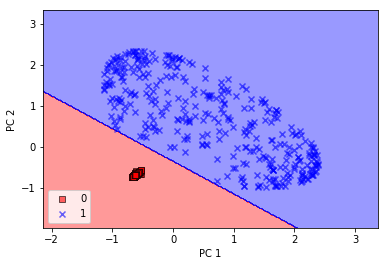

In [35]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.show()